### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [2]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 
- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta

Muestre 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

In [4]:
Fs = 100
print(*['La señal tiene',str(len(x)),'muestras.'])
print(*["La duracion de la señal es",str((1/Fs)*len(x)),"segundos."])

La señal tiene 2000 muestras.
La duracion de la señal es 20.0 segundos.


La frecuencia maxima que podemos estudiar es la frecuencia de Nyquist(Fs/2), que viene siendo la mitad de frecuencia de muestreo, en este caso sería 50[hz]. Esto sucede pues a la mitad de frecuencia del original creariamos una nueva frecuencia capaz de pasar por la fecuencia original perfectamente, tomando la suficiente información para interpolar el valor en base a ello.

![title](nyquist2.png)

<IPython.core.display.Javascript object>


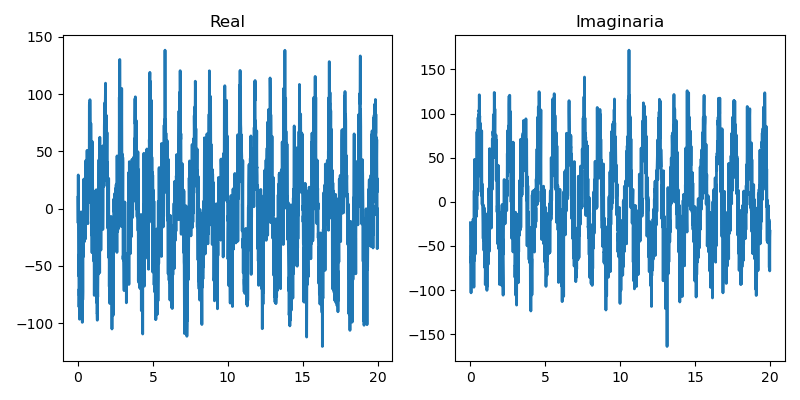

Text(0.5, 1.0, 'Imaginaria')

In [4]:
#Grafica con parte real e imaginaria
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), tight_layout=True)
t = np.arange(0, 20, step=1./Fs)
ax[0].plot(t, x.real, lw=2)
ax[0].set_title('Real')
ax[1].plot(t, x.imag, lw=2)
ax[1].set_title('Imaginaria')

<IPython.core.display.Javascript object>


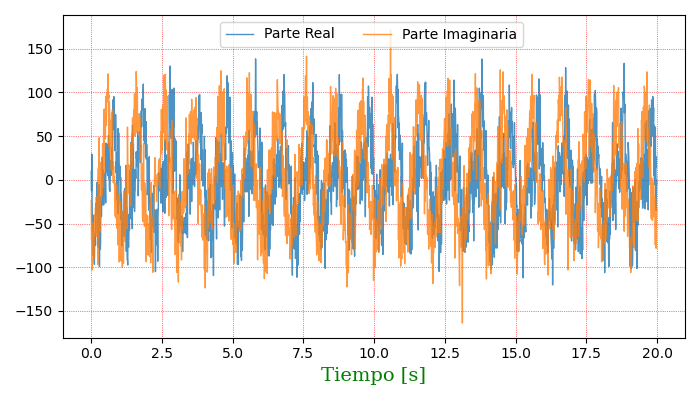

In [5]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

t = np.arange(0, 20, step=1./Fs)

ax.plot(t, x.real, linewidth=1, alpha=0.8, label='Parte Real')

ax.plot(t, x.imag, linewidth=1, alpha=0.8, label='Parte Imaginaria')

# Leyenda
ax.legend(loc=1, ncol=3, bbox_to_anchor=(0.75, 1))

# Texto para ejes y título
ax.set_xlabel('Tiempo [s]', fontsize=14, fontname='serif', color="green")

# Grilla
ax.grid(color="red", which="major", axis='both', linestyle=':', linewidth=0.5)


<IPython.core.display.Javascript object>


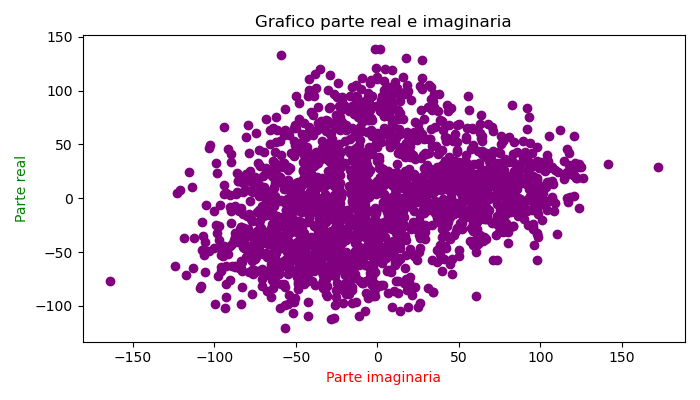

Text(0.5, 1.0, 'Grafico parte real e imaginaria')

In [6]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)
ax.scatter(x.imag, x.real, color="purple")

ax.set_xlabel('Parte imaginaria', color="red")
ax.set_ylabel('Parte real', color="green")
ax.set_title('Grafico parte real e imaginaria')

## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


In [1]:
import scipy.fft as sfft
def funcion(x):
    S = sfft.fft(x) # Transformada de fourier para los x datos complejos
    SA = np.absolute(S) #Módulo o amplitud de cada muestra compleja
    SP = np.angle(S)      #Nos entrega el ángulo asociadoa a cada operación
    freq = sfft.fftfreq(len(x), 1/100) #Indice frecuenciales a frecuencias [-Fs/2 , Fs/2]
    return SA, SP, freq  

<IPython.core.display.Javascript object>


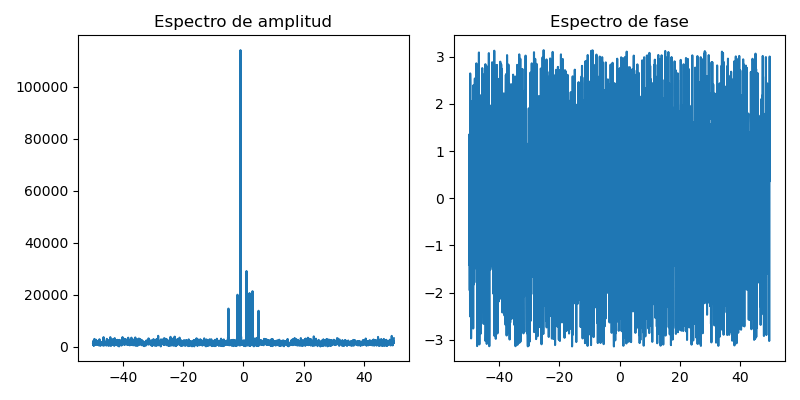

Text(0.5, 1.0, 'Espectro de fase')

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), 
                       sharex=True, tight_layout=True)
SA, SP, freq = funcion(x)

ax[0].plot(sfft.fftshift(freq),sfft.fftshift(SA))
ax[0].set_title('Espectro de amplitud')

ax[1].plot(sfft.fftshift(freq),sfft.fftshift(SP))
ax[1].set_title('Espectro de fase') # [-pi,pi]

In [9]:
def CompMayores(M):
    idx = (-SA).argsort() # Mayor a menor los indices del arreglo de amplitudes
    SANew = SA.copy()
    SANew[idx[M:]] = 0 
    return SANew, idx[:M] # (Espectro de amplitud modificado, índices componentes mayores de amplitud)
    

<IPython.core.display.Javascript object>


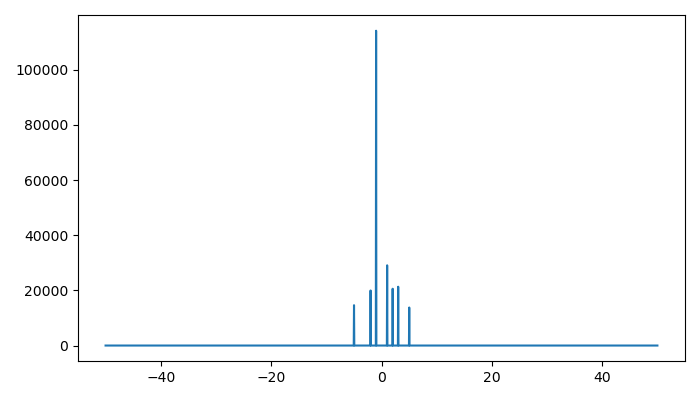

In [10]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)

M = 7 # M = 7
SANew, idM = CompMayores(M)
plt.plot(sfft.fftshift(freq),sfft.fftshift(SANew))

In [11]:
print("Amplitudes: ")
print(SA[idM])
print("Frencuencias ")
print(freq[idM])
print("Fases")
print(SP[idM])

Amplitudes: 
[114172.07496405  29095.71108497  21326.97306033  20598.95161544
  19964.34184966  14630.20281002  13788.41460493]
Frencuencias 
[-1.  1.  3.  2. -2. -5.  5.]
Fases
[-1.29886946 -2.82861611 -3.03996873  1.13605401 -1.99649896  0.10721682
  0.0412039 ]


## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

<IPython.core.display.Javascript object>


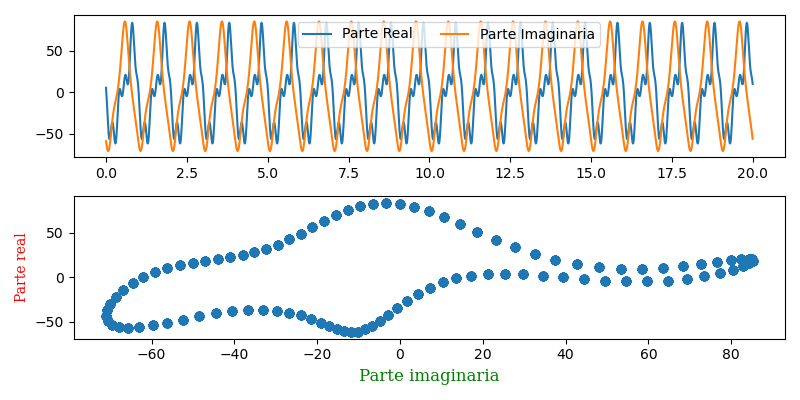

Text(0, 0.5, 'Parte real')

In [12]:
#Para M = 7
import scipy.fft as sfft
fig, ax = plt.subplots(nrows=2, ncols=1 ,figsize=(8, 4),  tight_layout=True)

M = 7 #Para M = 7

SAM7, freqs = CompMayores(M)

c = SAM7*np.exp(1j*SP) #Reconstrucción número complejo
signal = sfft.ifft(c)
ax[0].plot(t, signal.real, label='Parte Real')
ax[0].plot(t, signal.imag, label='Parte Imaginaria')
ax[0].legend(loc=1, ncol=3, bbox_to_anchor=(0.75, 1))
ax[1].scatter(signal.imag, signal.real)  # Parte real vs imaginaria
ax[1].set_xlabel('Parte imaginaria', fontsize=12, fontname='serif', color="green")
ax[1].set_ylabel('Parte real',fontsize=10, fontname='serif', color="red")



In [25]:
from ipywidgets import widgets, interact, IntSlider, Dropdown

#fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6),tight_layout=True)

M = [100,10,7,5,3,1]
def update(m=7):
    print(m)
    SAm, freqs = CompMayores(m)
    c = SAm*np.exp(1j*SP) #Reconstrucción número complejo
    signal = sfft.ifft(c)
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6),tight_layout=True)
    ax[0].plot(t, signal.real, label='Parte Real')
    ax[0].plot(t, signal.imag, label='Parte Imaginaria')
    ax[0].set_xlabel('Tiempo [s]', fontsize=14, fontname='serif', color="green")
    #ax[0].legend(loc=1, ncol=3, bbox_to_anchor=(0.75, 1)) 
    
    ax[1].scatter(signal.imag, signal.real, label="M="+str(m))  # Parte real vs imaginaria
    ax[1].legend(loc=1, ncol=6, bbox_to_anchor=(1, 1))
    ax[1].set_xlabel('Parte imaginaria', fontsize=14, fontname='serif', color="red")
    ax[1].set_ylabel('Parte real', color="green")
    
      
interact(update, m=widgets.Dropdown(options=M, value=7, description="Mvalue"));    

interactive(children=(Dropdown(description='Mvalue', index=2, options=(100, 10, 7, 5, 3, 1), value=7), Output(…

## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

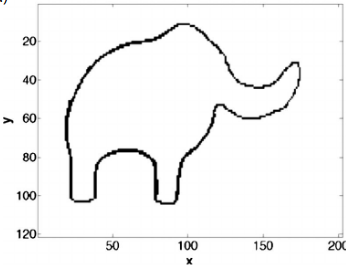